## Historical Station Price Data Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
%matplotlib inline



## Step1 :
 - Preprocessing -- load dataset and data cleaning 
 - Visualize the dataset
 

In [3]:
## laod the dataset
data_prices = pd.read_csv('prices.csv',delimiter=";")
data_stations = pd.read_csv('stations.csv',delimiter=";")

In [4]:
## rename column name for merging both dataset
data_prices = data_prices.rename(columns={'STID': 'ID'})

In [5]:
data_prices['DATE'] = data_prices['DATE_CHANGED']
data_prices['DATE'] = pd.to_datetime(data_prices['DATE'])
data_prices['DATE'] = data_prices['DATE'].dt.date




In [6]:
min(data_prices['DATE'])



datetime.date(2014, 6, 8)

In [7]:
max(data_prices['DATE'])


datetime.date(2015, 9, 29)

In [8]:
data_prices.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014-10-03
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014-10-03


In [9]:
data_stations.head()


,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [10]:
data_stations.shape

(824, 12)

In [11]:
data_prices.shape

(2189526, 7)

In [12]:
data_stations.describe()


,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [13]:
data_prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [14]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 7 columns):
ID              object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
DATE            object
dtypes: int64(4), object(3)
memory usage: 116.9+ MB


In [15]:
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [16]:
updated_data= pd.merge(data_prices,data_stations, on='ID', how='inner')


In [17]:
updated_data.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [18]:
updated_data.shape

(4379052, 18)

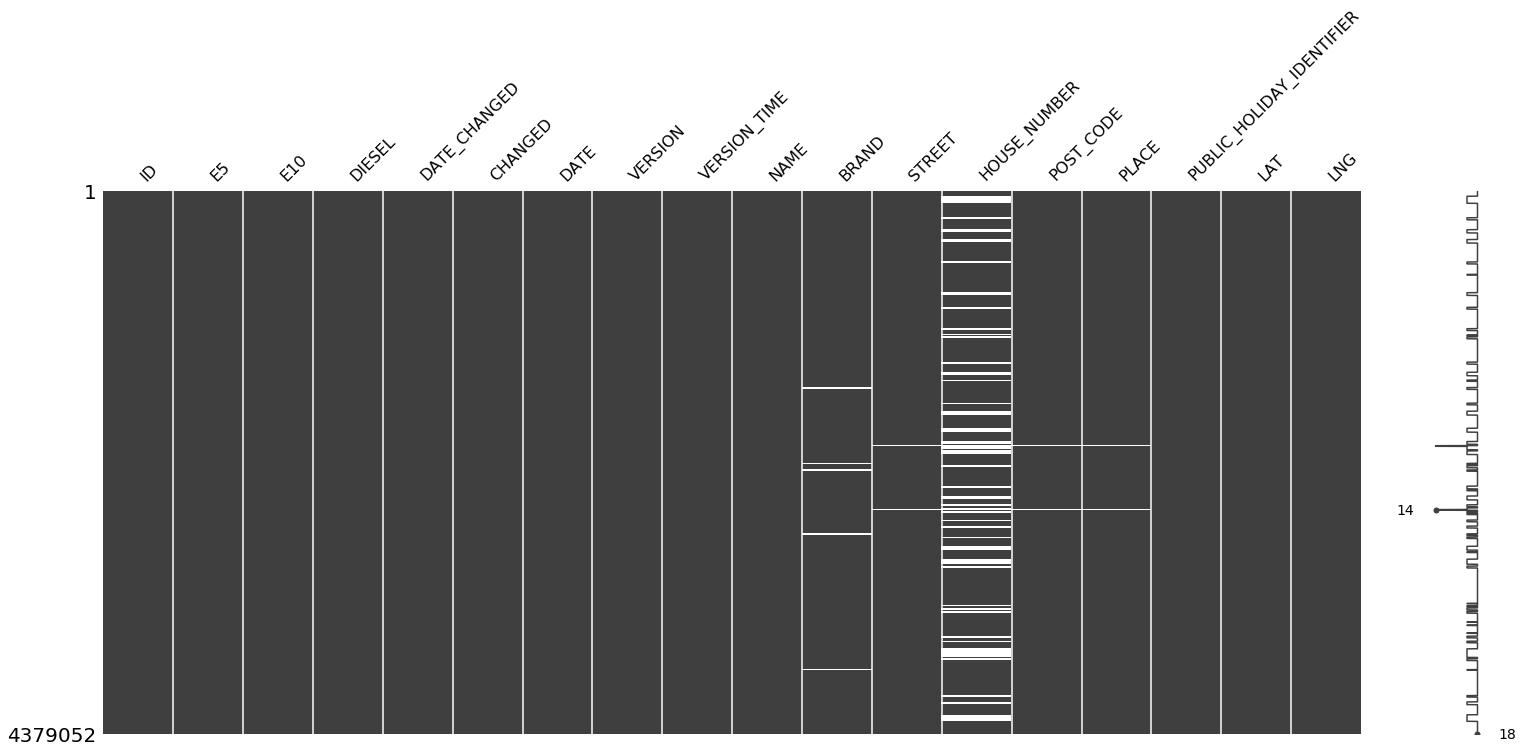

In [19]:
ms.matrix(updated_data)

In [20]:
## We dont need housnumber in our model so we drop this column
updated_data.drop('HOUSE_NUMBER',axis=1,inplace=True)

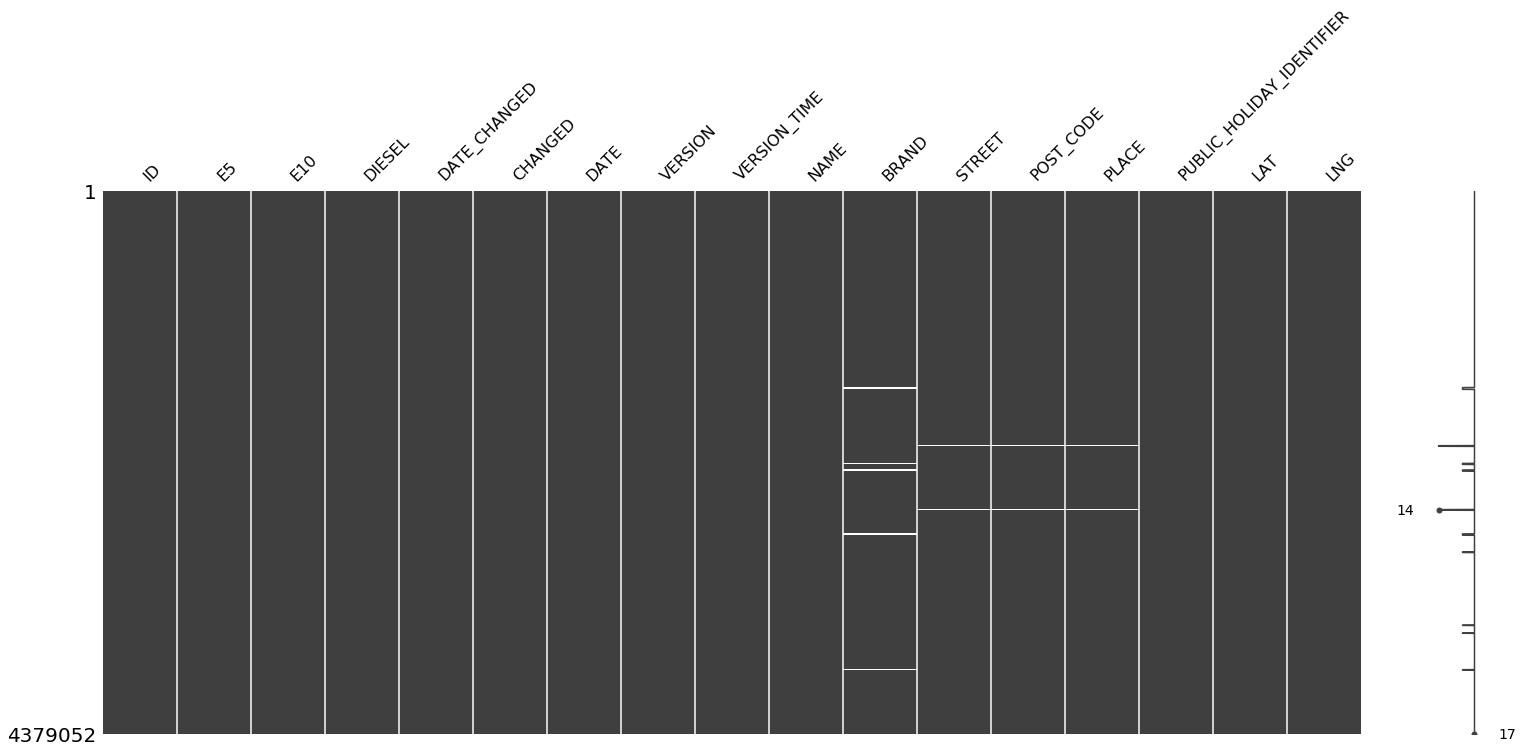

In [21]:
ms.matrix(updated_data)

## Step2 : Data Analysis and Visualization

In [22]:
updated_data.BRAND.unique()


array(['ESSO', 'ARAL', 'Supermarkt-Tankstelle', 'Shell',
       'Tankstelle Heinz', 'JET', 'Total', 'AVIA', 'Preis', 'Markant',
       'Frühmesser GmbH', 'TAMOIL', 'bft',
       'Supermarkt-Tankstelle am real- Markt', 'Mr. Wash Autoservice AG',
       'HEM', '\\N', 'Schuster & Sohn KG', 'Tankcenter', 'SB Markt', 'T',
       'E Center', 'BFT', 'Markenfreie TS', 'TOP', 'Freie',
       'Eberhardt Jöhlingen', 'mtb', nan, 'CLASSIC', 'Fritz Walter GmbH',
       'freie Tankstelle', 'Agip', 'TS ARNT', 'frei', 'OMV', 'Bft', 'rnt',
       'nicht mehr aktiv',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'SB',
       'Freie Tankstelle', 'TOTAL', 'ELAN',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493',
       'SB-Markttankstelle', 'ZG Raiffeisen Energie', 'ED',
       'Sefrin Heizöl & Kraftstoffe', 'Supermarkt Tankstelle',
       'Raiffeisen Tankstelle', 'OIL!', 'Winkler', 'Tankhof Iffezheim',
       'Schiffer & Nicklaus GmbH', 'Raiffeisen'], dtype=object)

In [23]:
updated_data.PLACE.unique()


array(['WORMS', 'Kirchheimbolanden', 'Mannheim', 'LUDWIGSHAFEN OGGERSHEIM',
       'RAMSTEIN', 'EISENBERG', 'Neustadt', 'Hochstadt', 'Kandel',
       'Karlsruhe', 'MONSHEIM', 'MANNHEIM', 'Freinsheim', 'Hatzenbühl',
       'Fischbach', 'Ettlingen', 'Frankenthal', 'Gernsheim',
       'Limburgerhof', 'Annweiler-Queichhambach', 'HASSLOCH', 'GAGGENAU',
       'KARLSRUHE', 'KAISERSLAUTERN', 'SCHWEGENHEIM', 'Speyer', 'Landau',
       'Durmersheim', 'SPEYER', 'Thaleischweiler-Fröschen', 'Bad Dürkheim',
       'BÖHL-IGGELHEIM', 'FRANKENTHAL', 'MUTTERSTADT', 'Herxheim',
       'Kuppenheim', 'LUDWIGSHAFEN', 'Baden-Baden', 'Marxzell',
       'Ludwigshafen', 'Phillipsburg', 'Edenkoben', 'Waldsee', 'LANDAU',
       'Kaiserslautern', 'Landstuhl', 'Karlsruhe-Knielingen', 'Haßloch',
       'Alzey', 'Karlsbad', 'LANDSTUHL', 'MUGGENSTURM', 'ROEMERBERG',
       'Rohrbach bei Landau', 'Worms', 'RUELZHEIM',
       'Ettlingen OT Schöllbronn', 'NEUSTADT', 'PHILIPPSBURG', 'RASTATT',
       'GERMERSHEIM', 'Osth

In [24]:
## sort by location and gas stations
updated_data.sort_values(['PLACE', 'BRAND'])

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE,VERSION,VERSION_TIME,NAME,BRAND,STREET,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
3690668,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690669,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690670,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690671,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690672,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690673,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690674,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690675,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690676,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690677,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681


In [25]:
updated_data.shape


(4379052, 17)

In [26]:
updated_data.describe()


,E5,E10,DIESEL,CHANGED,VERSION,LAT,LNG
count,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01,1.271200e+02,4.931849e+01,8.200793e+00
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00,2.637611e+02,2.527688e-01,2.797607e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,4.880079e+01,7.505350e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01,1.000000e+00,4.910107e+01,8.113780e+00
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01,4.000000e+00,4.935960e+01,8.307890e+00
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01,1.800000e+01,4.950350e+01,8.409320e+00
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01,8.810000e+02,4.979940e+01,8.499941e+00


In [27]:
updated_data['PLACE'].value_counts()

Karlsruhe                  308744
Ludwigshafen               179648
Mannheim                   162904
Kaiserslautern             136560
KARLSRUHE                  127940
LUDWIGSHAFEN               100636
MANNHEIM                    99960
Worms                       87700
KAISERSLAUTERN              76396
Speyer                      75984
RASTATT                     72440
WORMS                       72224
FRANKENTHAL                 62828
PIRMASENS                   56064
Neustadt                    54224
Ettlingen                   54152
WOERTH                      51300
LANDAU                      50740
Landau                      49968
Pirmasens                   48852
Edenkoben                   47240
Gernsheim                   44988
HASSLOCH                    44688
Phillipsburg                39400
MUTTERSTADT                 37184
Lampertheim                 36636
Rastatt                     35388
Schifferstadt               34760
GERMERSHEIM                 33092
SCHWEGENHEIM  

In [28]:
## drip all missing rows
clean_data = updated_data.dropna()

In [29]:
clean_data.shape

(4306448, 17)

In [30]:
clean_data.sort_values(['PLACE', 'BRAND'])

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE,VERSION,VERSION_TIME,NAME,BRAND,STREET,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
3690668,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690669,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690670,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690671,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690672,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690673,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690674,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690675,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690676,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690677,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681


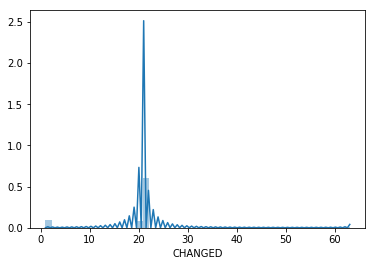

In [31]:
## show location wise
sns.distplot(clean_data['CHANGED'])

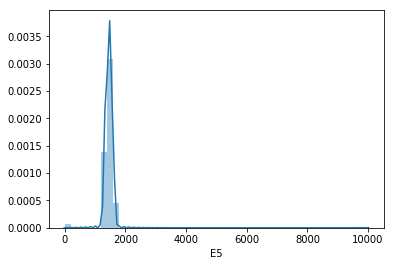

In [32]:
sns.distplot(clean_data['E5'])

In [33]:
## Remove all extra columns and get the final features
ndf=clean_data.set_index(pd.DatetimeIndex(clean_data['DATE']))
ndf.drop(['ID','DATE_CHANGED','VERSION','VERSION_TIME','STREET','PUBLIC_HOLIDAY_IDENTIFIER'],axis=1,inplace=True)
ndf.head(10)

,E5,E10,DIESEL,CHANGED,DATE,NAME,BRAND,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,,,,,
2014-10-02,1589,1549,1389,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1589,1549,1389,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1369,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1369,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1359,1,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1359,1,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1539,1499,1339,21,2014-10-03,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1539,1499,1339,21,2014-10-03,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1529,1489,1329,21,2014-10-03,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847


In [34]:
ndf.shape

(4306448, 11)

In [35]:
ndf.drop(ndf[ndf.DIESEL < 0].index, inplace=True)
ndf.drop(ndf[ndf.E5 < 0].index, inplace=True)
ndf.drop(ndf[ndf.E10 < 0].index, inplace=True)

In [36]:
ndf.shape

(3671960, 11)

In [37]:
## Converting prices into euro from cents
ndf['E5'] = ndf['E5'].apply(lambda x: x/1000)
ndf['E10'] = ndf['E10'].apply(lambda x: x/1000)
ndf['DIESEL'] = ndf['DIESEL'].apply(lambda x: x/1000)
ndf.head(10)

,E5,E10,DIESEL,CHANGED,DATE,NAME,BRAND,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,,,,,
2014-10-02,1.589,1.549,1.389,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.589,1.549,1.389,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.369,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.369,21,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.359,1,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.359,1,2014-10-02,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1.539,1.499,1.339,21,2014-10-03,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1.539,1.499,1.339,21,2014-10-03,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1.529,1.489,1.329,21,2014-10-03,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847


In [38]:

ndf.drop('DATE',axis=1,inplace=True)
ndf.head(10)



,E5,E10,DIESEL,CHANGED,NAME,BRAND,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,,,,
2014-10-02,1.589,1.549,1.389,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.589,1.549,1.389,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.369,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.369,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.359,1,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1.569,1.529,1.359,1,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1.539,1.499,1.339,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1.539,1.499,1.339,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-03,1.529,1.489,1.329,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847


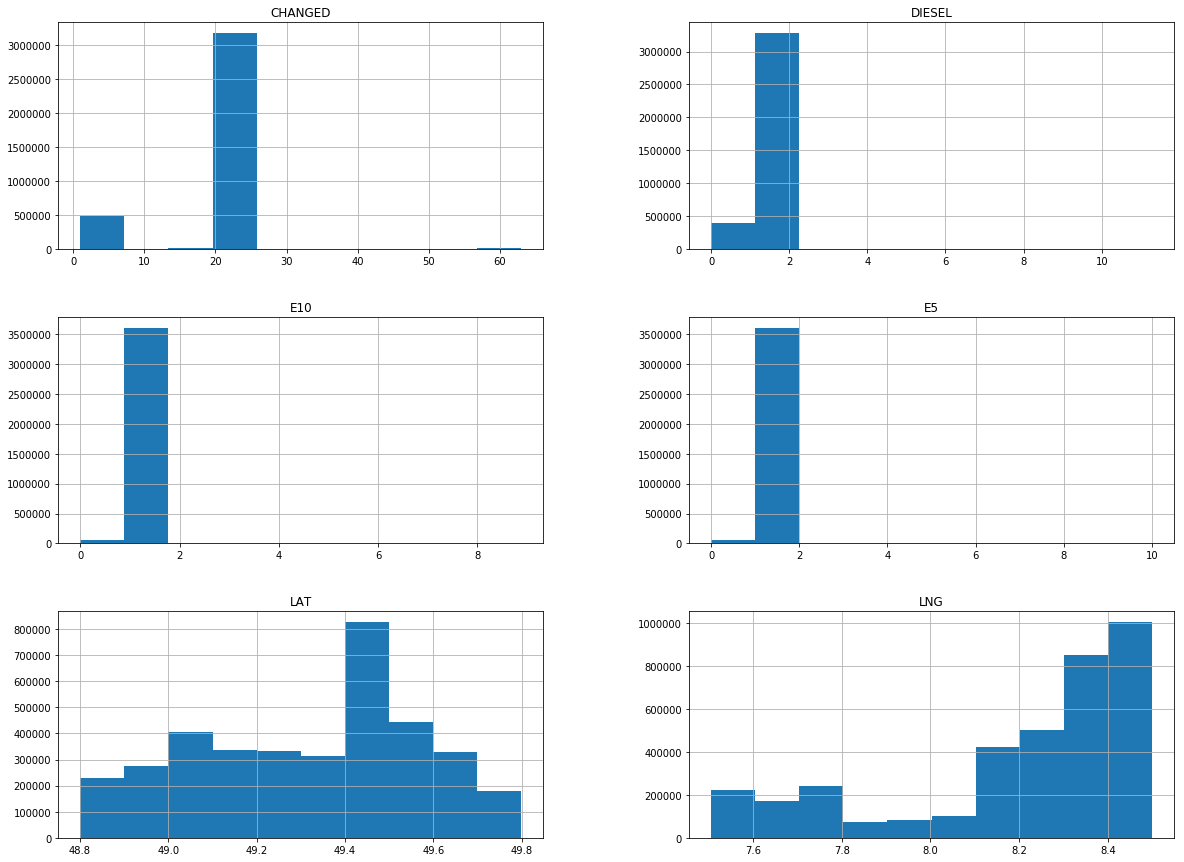

In [39]:
## visualize all features or attributes
ndf.hist(figsize=(20,15))
plt.savefig("plots/attribute_histogram_plots")
plt.show()

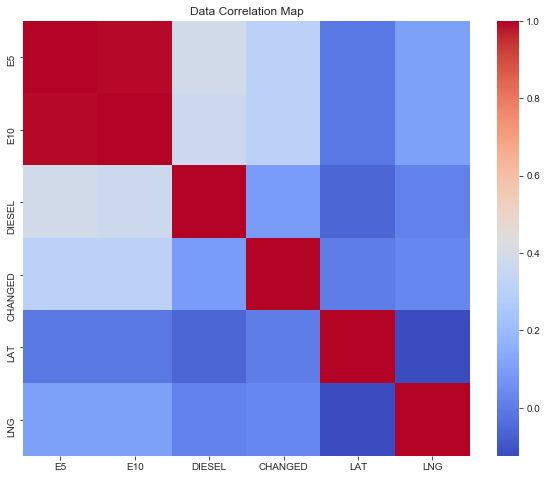

In [40]:
### data correlation using heatmap
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
sns.heatmap(ndf.corr(),cmap='coolwarm')
plt.title('Data Correlation Map')
fig.savefig("plots/data_corr")

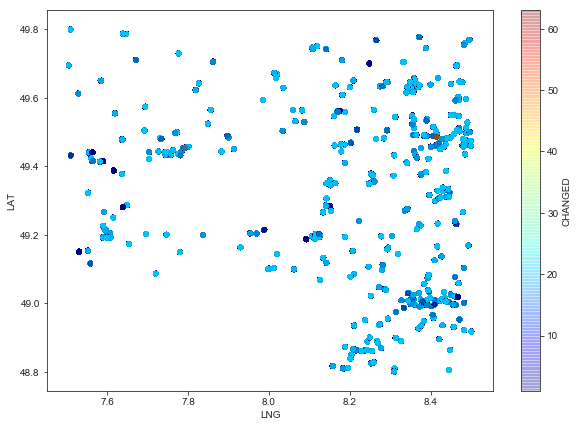

In [41]:
ndf.plot(kind="scatter", x="LNG", y="LAT", alpha=0.2,figsize=(10,7),
    c="CHANGED", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('plots/lnglat.png')

In [42]:
brand_groups = ndf.groupby('BRAND')
brand_groups.size()


BRAND
ARAL                                    622140
AVIA                                    389292
Agip                                    118584
BFT                                     124180
Bft                                       5216
CLASSIC                                   9408
E Center                                 12640
ED                                       34300
ELAN                                      7892
ESSO                                    413116
Eberhardt Jöhlingen                       3296
Freie                                    13392
Freie Tankstelle                         14328
Fritz Walter GmbH                         6904
Frühmesser GmbH                          36468
HEM                                      51224
JET                                     235640
Markant                                  10372
Markenfreie TS                            9616
Mr. Wash Autoservice AG                   5880
OIL!                                     70744
OMV    

In [43]:
brands_total = brand_groups.sum()
brands_total.sort_values('E5').head(20)

,E5,E10,DIESEL,CHANGED,LAT,LNG
BRAND,,,,,,
Raiffeisen,0.000,0.000,2819.588,2388,115901.104497,19233.889189
nicht mehr aktiv,18.828,18.468,16.308,924,791.764976,134.631982
frei,270.396,265.768,232.008,4796,9386.503661,1582.636800
TS ARNT,692.944,679.104,587.344,9064,24673.440640,4160.185120
Winkler,732.464,714.260,630.264,11572,26728.000446,4289.850846
Schiffer & Nicklaus GmbH,1053.352,1033.512,1641.180,15184,66411.989005,10949.866278
rnt,1759.112,1712.868,1533.468,25864,61753.170988,10574.925352
Eberhardt Jöhlingen,4802.112,4717.892,4136.336,69260,161392.631456,27700.493366
Raiffeisen Tankstelle,5337.232,5239.996,4530.112,70696,185098.928000,30601.698080


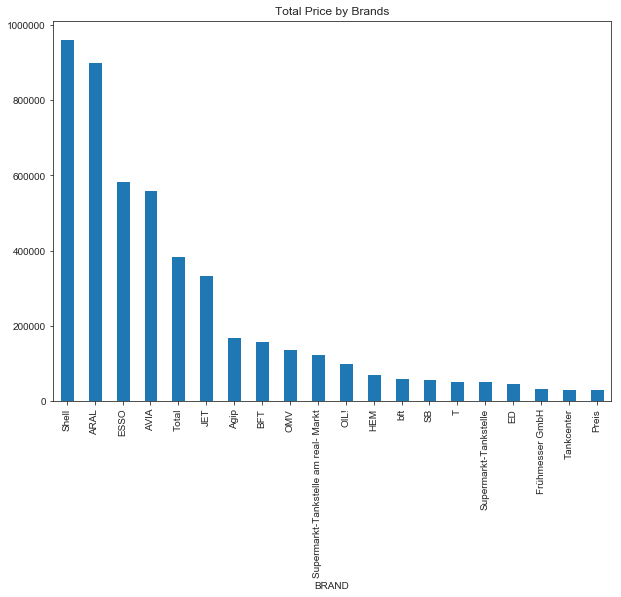

In [44]:
## list down 20 Gosoline Stations total prices for E5

brands_plots = brands_total['E5'].sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,7),title="Total Price by Brands")
plt.savefig('plots/brands_by_e5.png')


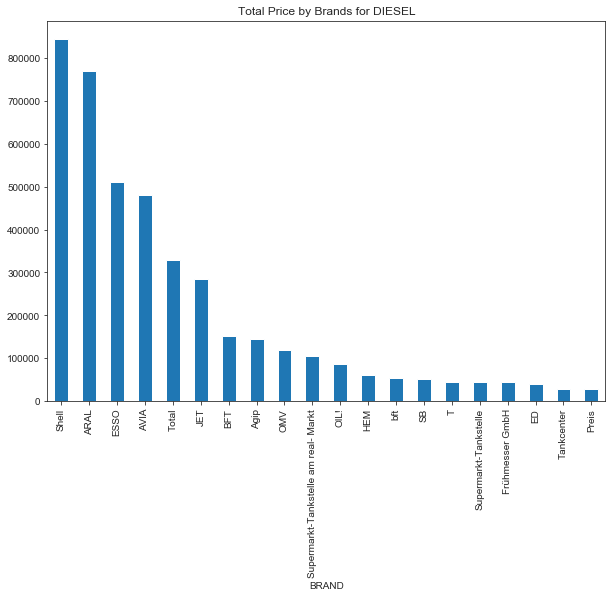

In [45]:
## list down 20 Gosoline Stations total prices for DIESEL

brands_plots = brands_total['DIESEL'].sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,7),title="Total Price by Brands for DIESEL")
plt.savefig('plots/brands_by_diesel_price.png')

In [46]:
## Show diesel price of 2014 monthly
price_changed_group=ndf.groupby(['BRAND','CHANGED']).sum()
price_changed_group.head(50)


E5         E10      DIESEL           LAT  \
BRAND   CHANGED                                                        
ARAL    1         72281.472000   70975.112   61240.156  2.498043e+06   
        2            17.468000      17.228       0.000  5.928508e+02   
        3            17.468000      17.228      19.584  7.901633e+02   
        4            33.936000      33.656      29.336  1.184190e+03   
        5           224.840000     225.680     195.680  7.903820e+03   
        16           70.388000      69.168      60.908  2.569955e+03   
        20        63458.376000   62324.696   54403.896  2.204310e+06   
        21       762485.883999  749036.100  650066.960  2.589439e+07   
        40            0.000000       0.000       9.672  3.924740e+02   
        42            0.000000       0.000       0.000  3.161112e+03   
        60           11.672000      11.792       9.472  3.924740e+02   
        61            6.116000       5.956       5.316  1.973125e+02   
        63         3170.400000    3108.800    2743.760  1.066390e+05   
AVIA    1         71439.608000   70130.568   60817.368  2.474246e+06   
        4          1180.500000    1167.060     995.140  4.027631e+04   
        5          3052.416000    3021.016    2543.056  1.034769e+05   
        16         3546.636000    3493.676    2954.756  1.201971e+05   
        17          540.504000     525.784     455.864  1.846187e+04   
        20        67593.324000   66353.404   57985.784  2.353064e+06   
        21       413447.444000  405870.652  353462.548  1.401460e+07   
        63         1332.036000    1305.636    1151.036  4.550071e+04   
Agip    1         17980.088000   17658.008   15210.244  6.212320e+05   
        2            28.620000      27.980       0.000  9.767740e+02   
        3             5.956000       5.796       5.116  1.953548e+02   
        4            17.548000      17.188      14.748  5.875228e+02   
        5            50.924000      50.484      42.844  1.770444e+03   
        16          117.592000     118.112     102.872  4.340563e+03   
        17           34.456000      33.376      28.496  1.181405e+03   
        20        13714.632000   13457.352   11761.904  4.772205e+05   
        21       137155.056000  134621.536  117173.428  4.712049e+06   
        23           23.784000      23.304      20.024  7.814192e+02   
        63          686.044000     672.444     590.644  2.345986e+04   
BFT     1         17478.476000   17141.824   29184.192  1.200299e+06   
        3             0.000000       0.000      66.904  2.759077e+03   
        4           681.940000     669.740     582.264  2.383410e+04   
        5           586.488000     573.568     505.648  2.028876e+04   
        16          806.772000     792.556     695.976  2.798339e+04   
        17          423.028000     412.948     357.748  1.438015e+04   
        20        16940.072000   16620.176   14512.344  5.895534e+05   
        21       122575.520000  120217.500  104647.292  4.198168e+06   
        63          662.136000     648.696     566.816  2.321886e+04   
Bft     1           681.084000     669.964     568.684  2.325745e+04   
        4             5.956000       5.876       5.076  1.954408e+02   
        5             5.916000       5.836       4.756  1.954408e+02   
        16           23.064000      22.624      19.344  7.817631e+02   
        17            5.876000       5.596       4.836  1.954408e+02   
        20          582.832000     573.032     494.712  1.993496e+04   
        21         6152.728000    6038.972    5260.808  2.089262e+05   
        63           40.092000      39.292      34.932  1.368085e+03   
CLASSIC 1          1554.252000    1523.372    1317.132  5.500234e+04   

                          LNG  
BRAND   CHANGED                
ARAL    1        4.149327e+05  
        2        9.835023e+01  
        3        1.320690e+02  
        4        1.954739e+02  
        5        1.297715e+03  
        16       4.175223e+02  
        20       3.660273e+

In [47]:
daily = ndf.resample(rule='D').mean()
daily.head()

,E5,E10,DIESEL,CHANGED,LAT,LNG
DATE,,,,,,
2014-08-16,1.541033,1.501452,1.377468,18.856985,49.291128,8.216845
2014-08-17,1.557165,1.517488,1.393450,18.555396,49.286577,8.208483
2014-08-18,1.524945,1.485646,1.374056,17.182194,49.302152,8.217333
2014-08-19,1.534358,1.495002,1.370675,18.985947,49.304264,8.217524
2014-08-20,1.529787,1.490455,1.367177,18.244434,49.298358,8.220428


In [48]:
monthly = ndf.resample(rule='M').mean()
monthly.shape

(14, 6)

In [49]:
monthly.head()

,E5,E10,DIESEL,CHANGED,LAT,LNG
DATE,,,,,,
2014-08-31,1.546266,1.506850,1.377837,18.670600,49.303140,8.217311
2014-09-30,1.543033,1.503883,1.368611,19.236966,49.298501,8.227272
2014-10-31,1.497514,1.458322,1.331693,18.468973,49.297097,8.231316
2014-11-30,1.453140,1.414043,1.310755,18.618408,49.312964,8.214677
2014-12-31,1.335755,1.296601,1.209479,18.261365,49.323797,8.195578


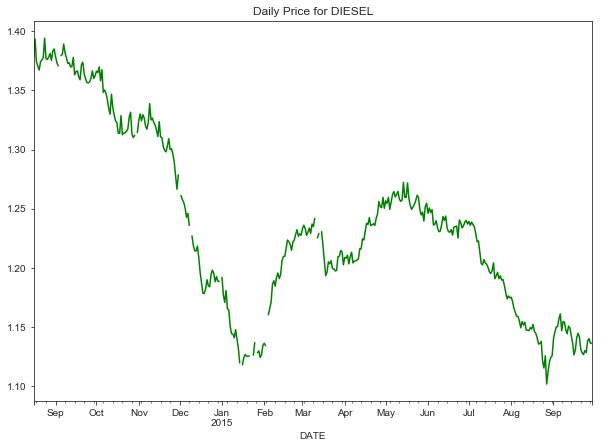

In [57]:
daily['DIESEL'].plot(c='g',figsize=(10,7),title="Daily Price for DIESEL")

plt.savefig('plots/dailt_price.png')

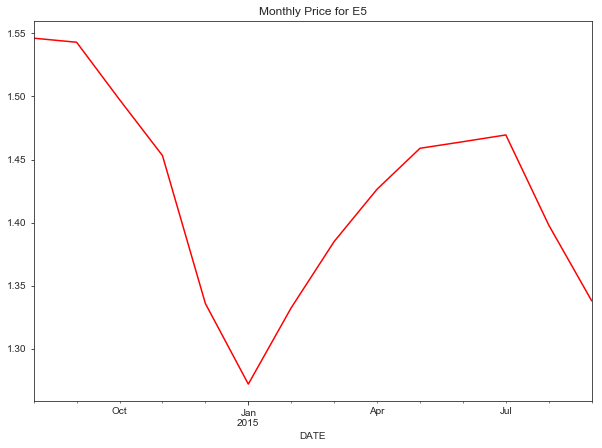

In [56]:
monthly['E5'].plot(c='r',figsize=(10,7),title="Monthly Price for E5")

plt.savefig('plots/monthly_price.png')




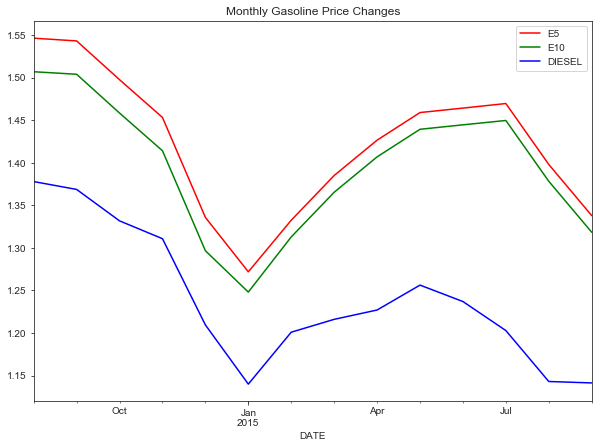

In [60]:
monthly['E5'].plot(c='r',figsize=(10,7),title="Monthly Gasoline Price Changes")
monthly['E10'].plot(c='g',figsize=(10,7),title="Monthly Gasoline Price Changes")
monthly['DIESEL'].plot(c='b',figsize=(10,7),title="Monthly Gasoline Price Changes")
plt.legend()
plt.savefig('plots/monthly_price_all.png')

In [61]:
# Each Gesoline type price for each month
types = ['E5','E10','DIESEL']
# price_min_max = ndf.groupby(types, a=True)['VERSION'].agg(['min', 'mean', 'max'])
price_min_max = ndf['E5'].resample(rule='M').max()
price_min_max.head(15)

DATE
2014-08-31    1.709
2014-09-30    1.719
2014-10-31    1.699
2014-11-30    1.669
2014-12-31    1.569
2015-01-31    1.479
2015-02-28    1.509
2015-03-31    1.569
2015-04-30    1.629
2015-05-31    1.649
2015-06-30    8.888
2015-07-31    9.999
2015-08-31    8.888
2015-09-30    1.559
Freq: M, Name: E5, dtype: float64

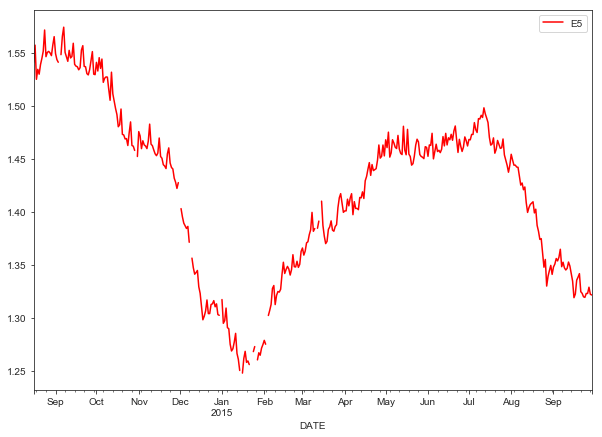

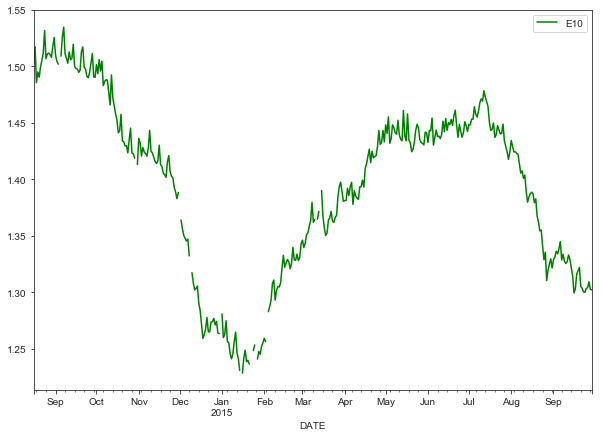

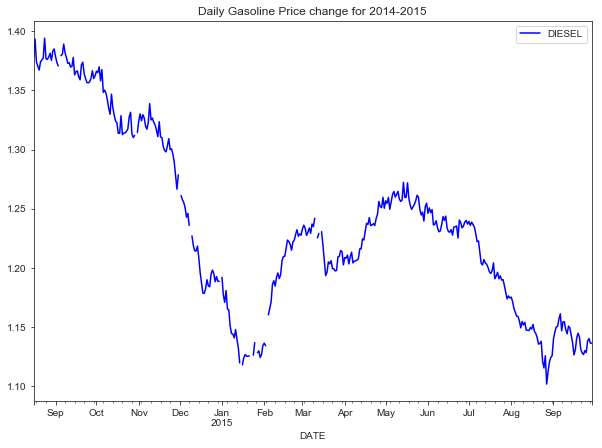

In [63]:
daily.plot(x=daily.index, y='E5', kind='line', c='r',figsize=(10,7))
daily.plot(x=daily.index, y='E10', kind='line', c='g',figsize=(10,7))
daily.plot(x=daily.index, y='DIESEL', kind='line', c='b',figsize=(10,7),title="Daily Gasoline Price change for 2014-2015")

plt.savefig('plots/daily_all_prices.png')

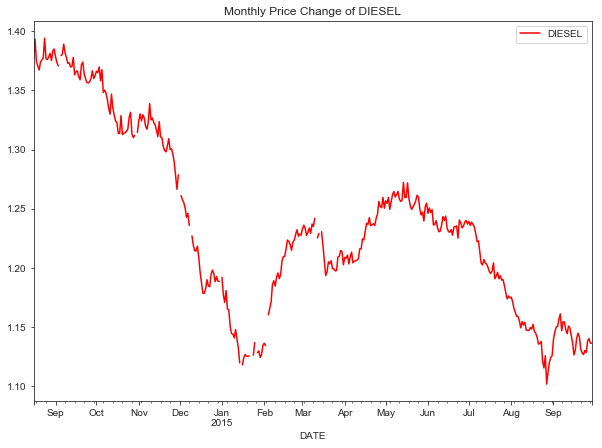

In [64]:
daily.plot(x=daily.index, y='DIESEL', kind='line', c='r',figsize=(10,7),title="Monthly Price Change of DIESEL")
plt.savefig('plots/price_diesel_date.png')


## Step 3: Price Prediction Model

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ndf.drop(['E5','E10','DIESEL'],axis=1), 
                                                    ndf['E5'], test_size=0.30, 
                                                    random_state=101)

In [67]:
X_train

,CHANGED,NAME,BRAND,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,
2015-05-08,21,Blankenloch,BFT,76297,Stutensee-Blankenloch,49.076354,8.459837
2015-04-13,21,Esso Tankstelle,ESSO,76744,WOERTH,49.047016,8.271659
2015-03-16,21,Total OSTHOFEN,Total,67574,OSTHOFEN,49.704600,8.331681
2015-07-03,21,Edenkoben Staatsstr. 2,HEM,67480,Edenkoben,49.285416,8.140352
2014-11-11,21,WORMS LUDWIGSTR,Shell,67547,Worms,49.631500,8.368970
2015-04-30,21,Aral Tankstelle,ARAL,67227,Frankenthal,49.548360,8.353849
2015-07-05,21,Thaleischweiler-Fröschen Gewerbegebiet Ost 4,TAMOIL,66987,Thaleischweiler-Fröschen,49.267086,7.592517
2015-08-09,21,WORMS SCHOENAUER STR,Shell,67547,Worms,49.626800,8.359850
2014-08-30,21,Mannheim Möhlstrasse,Mr. Wash Autoservice AG,68165,Mannheim,49.475090,8.487400


In [68]:
y_train

DATE
2015-05-08    1.559
2015-04-13    1.419
2015-03-16    1.379
2015-07-03    1.469
2014-11-11    1.519
2015-04-30    1.479
2015-07-05    1.459
2015-08-09    1.479
2014-08-30    1.479
2015-06-20    1.579
2015-05-23    1.439
2015-06-08    1.579
2015-03-26    1.539
2014-08-26    1.539
2015-08-29    1.369
2014-12-08    1.389
2015-04-27    1.479
2015-01-27    1.279
2014-09-26    1.619
2014-10-11    1.479
2014-09-17    1.499
2015-09-17    1.349
2015-08-28    1.409
2015-04-11    1.459
2015-03-26    1.499
2015-07-23    1.439
2015-03-07    1.409
2015-09-03    1.359
2015-06-19    1.529
2015-06-06    1.469
              ...  
2015-09-25    1.329
2015-09-19    1.319
2015-07-16    1.489
2014-11-23    1.499
2015-06-15    1.429
2015-03-16    1.399
2015-09-29    1.339
2015-04-15    1.449
2014-12-29    1.299
2015-04-01    1.419
2014-10-01    1.559
2015-01-07    0.000
2015-04-11    1.519
2015-09-19    1.319
2015-03-19    1.339
2014-11-09    1.519
2015-02-26    1.439
2015-04-20    1.419
2014-11-13    1

In [74]:
# Prepare the data for model
prices = ndf['E5'].tolist()
dates = ndf.index.to_julian_date().tolist()

 
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

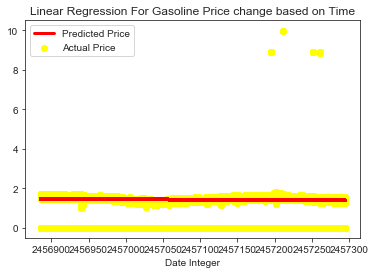

485.135675002 -0.000196865610574 485.137643658


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

## create a regression model ##
e5_price_model_regression = LinearRegression()
e5_price_model_regression.fit(dates, prices)

#V isualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, e5_price_model_regression.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression For Gasoline Price change based on Time')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Predict Price on Given Date
date = 10
predicted_price =e5_price_model_regression.predict(date)
print(predicted_price[0][0],e5_price_model_regression.coef_[0][0] ,e5_price_model_regression.intercept_[0])

C:\Users\Eman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


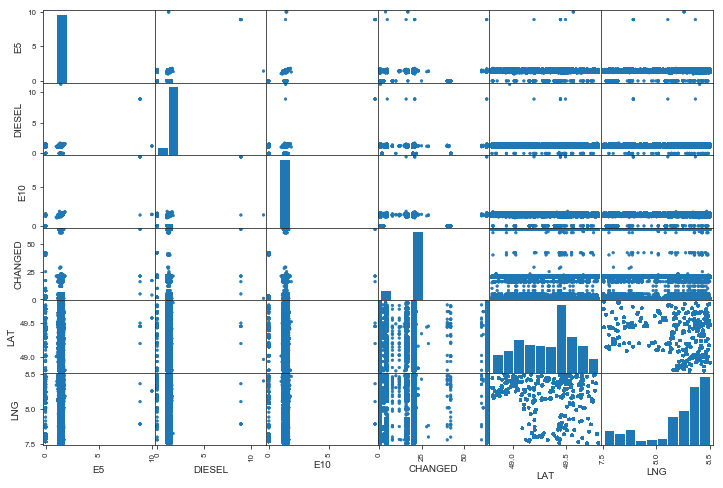

In [78]:
from pandas.tools.plotting import scatter_matrix

attributes = ["E5", "DIESEL", "E10", "CHANGED","POST_CODE","LAT","LNG"]
scatter_matrix(ndf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')